In [3]:
import numpy as np

import matplotlib.pyplot as plt 

import keras 

import cv2 

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
import torch
if(torch.cuda.is_available()):
    print("YES")
else:
    print("NO")

c:\Users\Windows\.conda\envs\yolo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


YES


In [5]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability

print("GPU", "avaliable (YeSSSS!!!)" 
      if tf.config.list_physical_devices("GPU") else "not avaliable :(")

TF version: 2.11.0
TF Hub version: 0.12.0
GPU not avaliable :(


In [6]:
import pandas as pd

labels_csv = pd.read_csv("labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<AxesSubplot: >

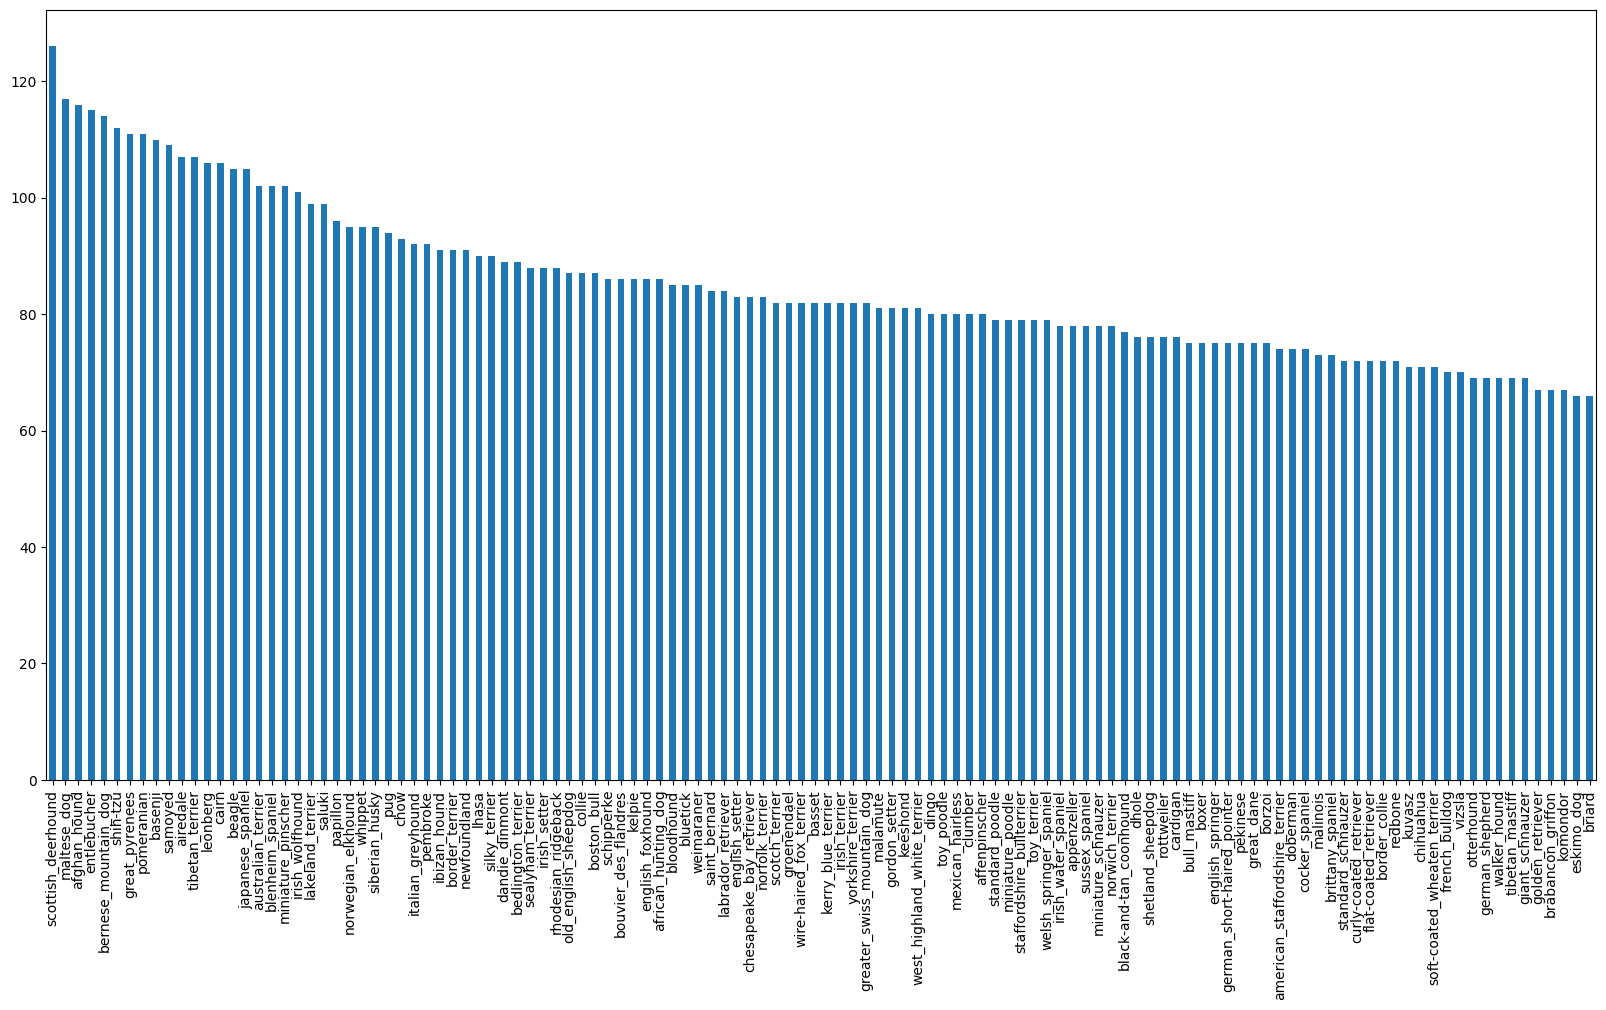

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

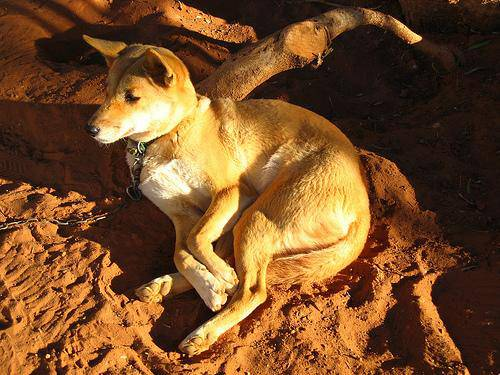

In [6]:
from IPython.display import Image

Image("train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [7]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
filenames= ["train/" + fname +".jpg" for fname in labels_csv['id']]

filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
import os
os.listdir("train")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
import os 

if len(os.listdir("train"))==len(filenames):
  print("Filenames match actual amount od files! Proceed")
else:
  print("Filenames do not match actual amount of files, check the target directory")


Filenames match actual amount od files! Proceed


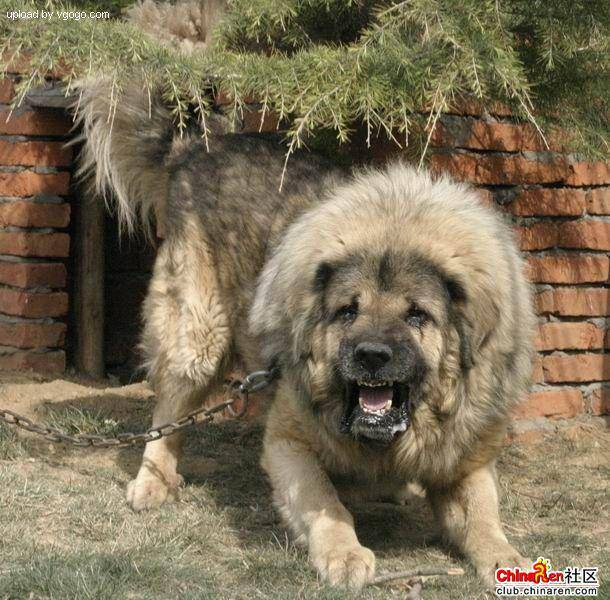

In [14]:
Image(filenames[9000])

In [11]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [12]:
import numpy as np
labels= labels_csv["breed"] ###or .to_numpy()
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels doesnt match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [14]:
unique_breeds = np.unique(labels)
unique_breeds
len(unique_breeds)

120

In [17]:

print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
len(boolean_labels)

10222

In [17]:
print(labels[0])
print(np.where(unique_breeds==labels[0])) # Index where label occurs
print(boolean_labels[0].argmax()) # Index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [18]:
x= filenames
y= boolean_labels

In [19]:
# Set number of imges to use for experimenting

NUM_IMAGES =1000  #@param {type:"slider", min:1000,max:10000,step:1000}

In [20]:
from sklearn.model_selection import train_test_split

#np.random.seed(42)

# Split into training and validation of total size NUM_IMAGES

x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],
                                               test_size = 0.2, random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [21]:
x_train[:5], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

In [22]:

from matplotlib.pyplot import imread
image = imread(filenames[42])

In [23]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [26]:
# Turning images into tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [24]:
# Define image size
IMG_SIZE = 224

In [25]:
# Createing a function for preprocesing images

def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turns the jpeg into numerical Tensor with 3 colour channels (Red,Green, Blue)

  image= tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values

  image = tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image to our desire value (224,2444)

  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image

In [30]:
# Create a simple function to return a tuple(image,label)

def get_image_label(image_path,label):

#Takes an image file path name and the associated 
#label, processes the image and retruns a tuple of (image,label)

  image=process_image(image_path)
  return image, label

In [26]:
# Demo od ovoga iznad
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [31]:
data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

data_batch = data.map(get_image_label).batch(32)


data_batch


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [28]:
# Define a batch size, 32 is a good size

BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(x,y=None,batch_size=BATCH_SIZE, valid_data=False,test_data=False):

  ''' Creates batches of data out of image (x) and (y) pairs.
  Shuggles the data if its training data
   but doesnt shuffle if its validation data
  '''
  # if the data is a test dataset, we probably dont habe labels

  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))

    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch

    # If the data is avalid dataset, we dont need to shuffle it

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch
  
  else:
    print("Create training data batches")
    # Turn filepaths and labels into Tensors

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    
    # Suffling pathnames and labels before mapping image processor function is faster than shuffing images


    data = data.shuffle(buffer_size=len(x))
    # Create (image, label) tuples (this also turns the image path into preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches

    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [32]:
# Creating trainig and validation data batches

train_data = create_data_batches(x_train,y_train)
val_data= create_data_batches(x_val,y_val, valid_data=True)

Create training data batches
Creating validation data batches...


In [33]:
# Check out the different attributes of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [39]:
import matplotlib.pyplot as plt


# Create a function for viewing images in a data batch 

def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """

# Setup the figure

  plt.figure(figsize=(10,10))

# Loop thorugh 25 ( for displaying 25 images)

  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
# Display an image
    plt.imshow(images[i])
# Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])

# Turn the grid lines off
   # plt.axis("off")

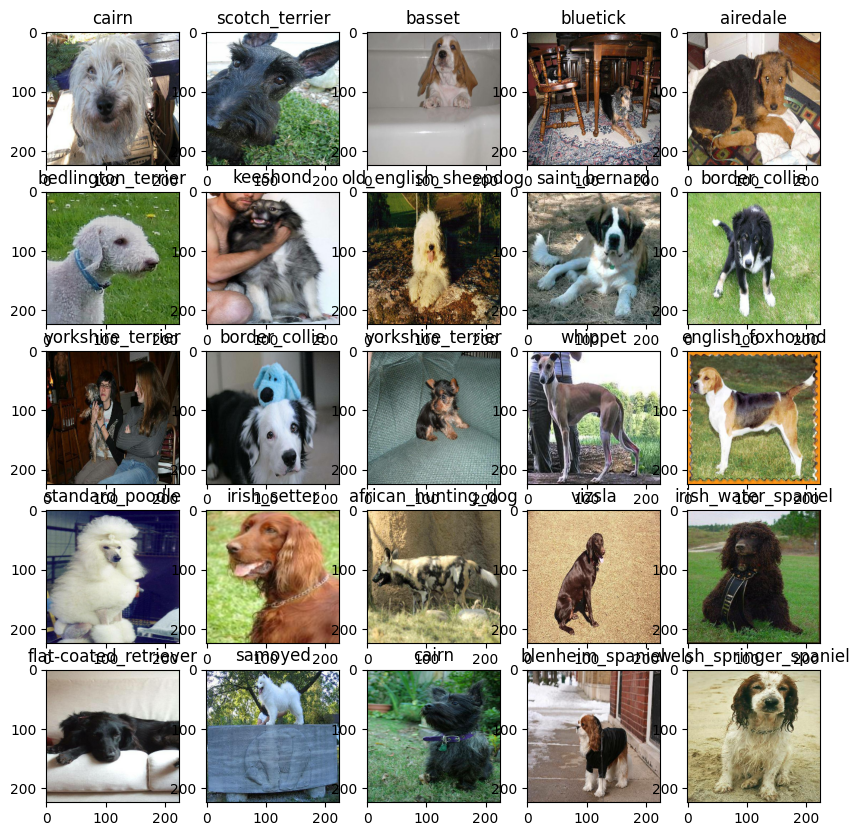

In [42]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

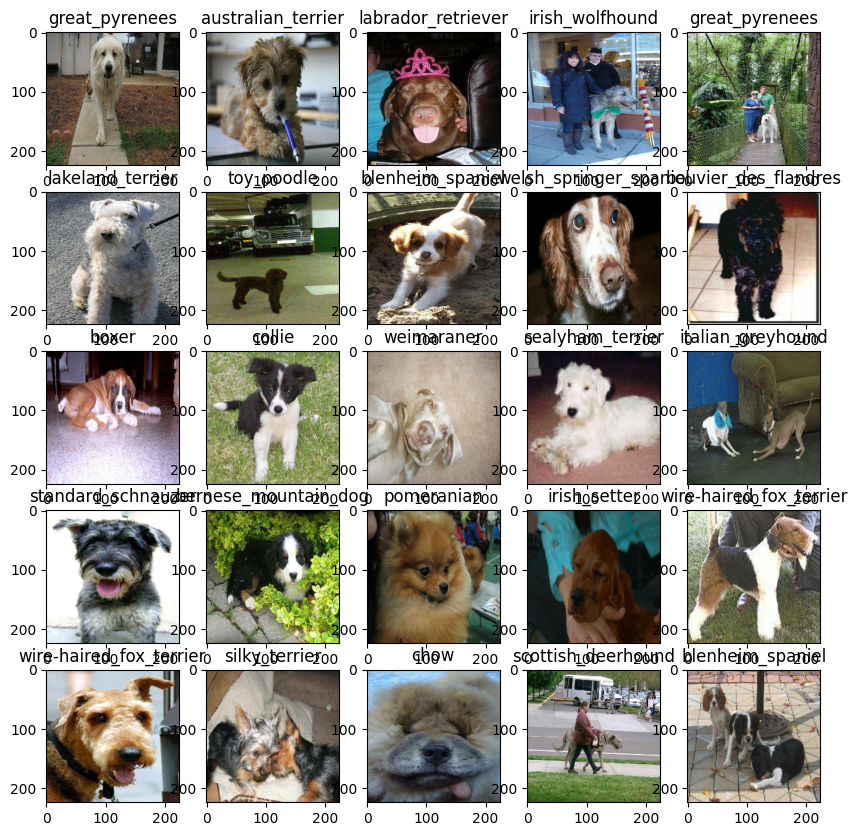

In [40]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

In [34]:
# Setup input shape to the model

INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]  #batch,height, width,color channels

# Setup output shape od our model

OUTPUT_SHAPE = len(unique_breeds)

len(unique_breeds)

# Setup model URL from TensorFLow Hub

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [35]:
# Create a function whch builds a Keras model


def create_model(input_shape = INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building model with:", MODEL_URL)
  # Setup the model layers
  model = tf.keras.Sequential([
  hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
  tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                        activation="softmax") #Layer 2 (output layer)
  ])

  # Compile the model

  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Building the model

  model.build(INPUT_SHAPE)

  return model

In [36]:
model = create_model()
model.summary()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [37]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [38]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [39]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [40]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [66]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 33s 1s/step - loss: 4.5254 - accuracy: 0.1112 - val_loss: 3.3623 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 28s 1s/step - loss: 1.6165 - accuracy: 0.7025 - val_loss: 2.1803 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 28s 1s/step - loss: 0.5678 - accuracy: 0.9350 - val_loss: 1.7169 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 27s 1s/step - loss: 0.2498 - accuracy: 0.9875 - val_loss: 1.5118 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 28s 1s/step - loss: 0.1441 - accuracy: 0.9962 - val_loss: 1.4299 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 28s 1s/step - loss: 0.1002 - accuracy: 1.0000 - val_loss: 1.3717 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================] - 28s 1s/s

In [48]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [64]:
# Make predictions on the validation data (not used to train on)
predictions = loaded_1000_image_model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 8s 952ms/step


array([[2.09326448e-04, 1.15974435e-05, 3.78711498e-04, ...,
        1.81844822e-04, 2.00937375e-05, 4.32842178e-03],
       [3.28671047e-03, 4.22470941e-04, 1.72185362e-03, ...,
        3.25460540e-04, 6.47989276e-04, 2.56286785e-05],
       [2.39685050e-05, 6.71819871e-05, 3.07148293e-05, ...,
        2.28323246e-04, 1.98601410e-04, 3.87407454e-05],
       ...,
       [6.24131644e-06, 6.54440955e-05, 1.08462264e-04, ...,
        2.72579973e-06, 2.67352298e-05, 2.46365780e-05],
       [3.00600100e-03, 6.16906618e-05, 6.38339188e-05, ...,
        2.07069879e-05, 1.44450150e-05, 4.57144203e-03],
       [1.00792866e-04, 3.60802878e-05, 1.04766828e-03, ...,
        1.94481423e-03, 1.37356226e-04, 3.88024528e-05]], dtype=float32)

In [69]:
predictions[0]

array([2.09326448e-04, 1.15974435e-05, 3.78711498e-04, 1.11328613e-04,
       1.87470345e-04, 8.48592390e-06, 9.03869141e-03, 4.40949632e-04,
       4.07655425e-05, 2.23146155e-04, 5.86349866e-04, 7.21325487e-05,
       2.66689185e-05, 2.02182982e-05, 1.21404169e-04, 6.50919159e-04,
       1.02520971e-05, 2.55964756e-01, 1.42032532e-05, 4.33330315e-05,
       6.29887625e-04, 1.50293918e-05, 7.56008603e-06, 1.01087207e-03,
       1.16155534e-05, 1.47176499e-04, 3.12245965e-01, 7.92073697e-05,
       1.63722245e-04, 1.74687928e-04, 3.13094439e-04, 1.56036636e-04,
       3.87310836e-04, 3.19717692e-05, 1.69188163e-04, 2.62131505e-02,
       1.47961000e-05, 1.21717123e-04, 9.41724720e-05, 2.19843147e-04,
       6.60934893e-04, 5.75060358e-06, 1.50614032e-05, 4.34604226e-05,
       2.83003610e-05, 2.30265359e-05, 6.80974481e-05, 5.82290595e-05,
       9.13194090e-05, 1.35454218e-04, 2.50188925e-04, 8.33581362e-05,
       2.45543080e-04, 2.40543777e-05, 1.02848688e-04, 1.23516566e-05,
      

In [65]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[4.16113216e-05 5.54853323e-05 2.90684748e-05 6.99962911e-05
 3.26886453e-04 5.45283510e-05 4.53997927e-05 4.25458333e-04
 5.71591780e-03 1.28511051e-02 1.10239989e-05 1.16282727e-05
 6.67100889e-04 9.52687464e-04 3.02083092e-04 1.01833662e-03
 1.54397037e-06 8.86000489e-05 2.97166080e-05 2.26452568e-04
 5.48732205e-05 1.52822264e-04 2.44880812e-05 3.94930685e-05
 6.40367344e-03 6.78105207e-05 3.14637578e-06 1.08912127e-05
 9.79736287e-05 1.08813811e-05 1.38290183e-04 8.20310961e-05
 1.37827319e-05 1.26599107e-05 1.52850462e-05 2.16917415e-05
 4.65113153e-05 1.81861571e-04 3.07648006e-05 6.25239238e-02
 1.07815707e-04 6.47122488e-06 1.40727335e-03 7.37106348e-06
 1.26217987e-04 1.66705559e-05 1.65457721e-04 9.12243268e-05
 3.86833926e-05 1.58154056e-04 1.63476034e-05 4.94846936e-05
 1.59328221e-04 7.36138027e-04 1.37344987e-05 2.11899587e-05
 1.69157851e-04 5.17895824e-05 1.56007482e-05 1.22779802e-05
 3.57884383e-05 3.47594701e-04 5.70918871e-07 1.76452868e-05
 4.10034445e-05 2.519698

In [71]:

unique_breeds[113]

'walker_hound'

In [66]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'golden_retriever'

In [56]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [67]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

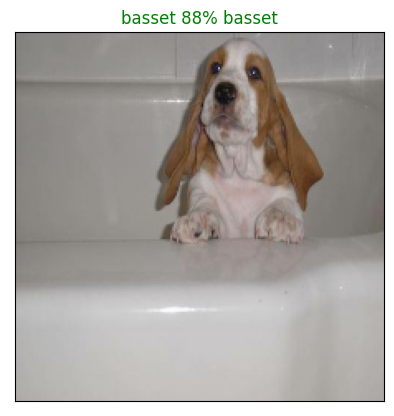

In [79]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=2)

In [74]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

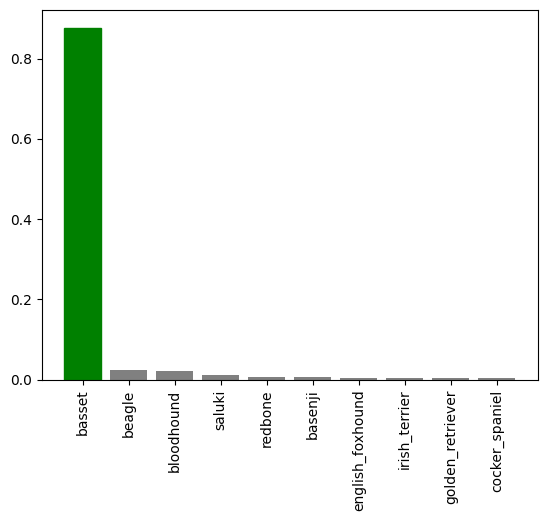

In [77]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=2)

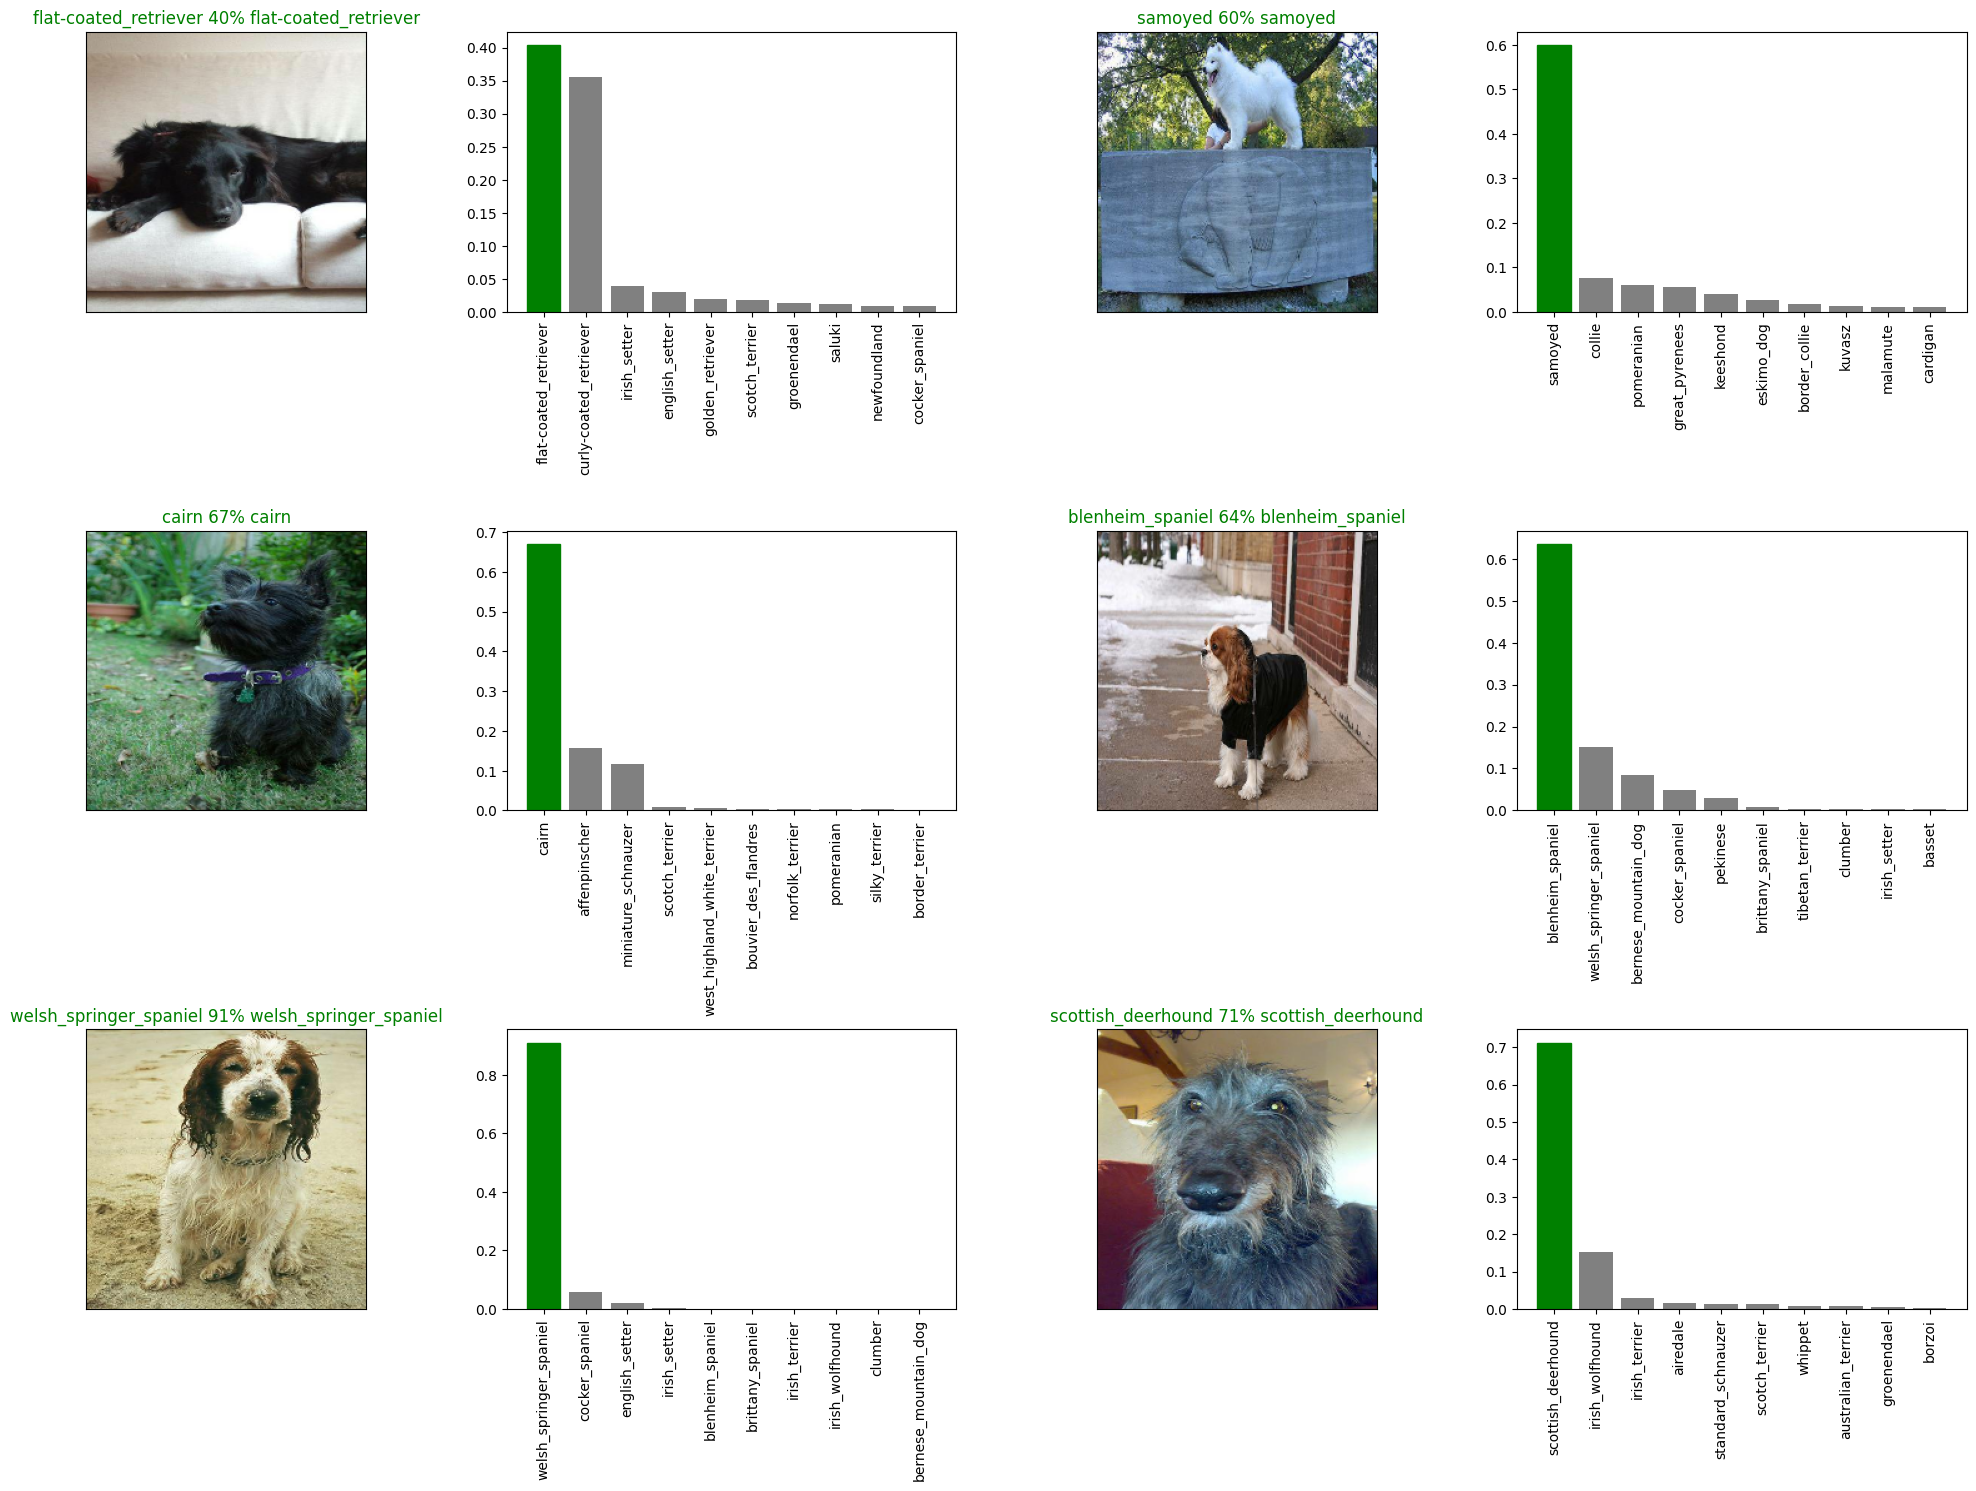

In [78]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [62]:
import time
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("C://Users//Windows//Desktop//PESEKI//model",
                          datetime.datetime.now().strftime(f"%m-%d-%Y %H:%M%p"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [1]:
import time
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [106]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images")

Saving model to: C://Users//Windows//Desktop//PESEKI//model\12-16-2022 09:30AM-1000-images.h5...


'C://Users//Windows//Desktop//PESEKI//model\\12-16-2022 09:30AM-1000-images.h5'

In [63]:
# Load a trained model
# C:\Users\Windows\Desktop\PESEKI\model\12-16-2022 09
loaded_1000_image_model = load_model('C://Users//Windows//Desktop//PESEKI//model\\12-16-2022 09:30AM-1000-images.h5')

Loading saved model from: C://Users//Windows//Desktop//PESEKI//model\12-16-2022 09:30AM-1000-images.h5


In [80]:

# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 8s 940ms/step - loss: 5.7421 - accuracy: 0.0000e+00


[5.742136001586914, 0.0]

In [81]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 9s 1s/step - loss: 1.2383 - accuracy: 0.7050


[1.2382758855819702, 0.7049999833106995]

In [115]:
len(x), len(y)

(10222, 10222)

In [83]:
# Create a data batch with the full data set
full_data = create_data_batches(x, y)

Create training data batches


In [84]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [88]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [89]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [92]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 320s 998ms/step - loss: 0.7477 - accuracy: 0.7844
Epoch 2/100
320/320 [==============================] - 309s 965ms/step - loss: 0.3514 - accuracy: 0.8975
Epoch 3/100
320/320 [==============================] - 300s 937ms/step - loss: 0.2119 - accuracy: 0.9426
Epoch 4/100
320/320 [==============================] - 329s 1s/step - loss: 0.1397 - accuracy: 0.9677
Epoch 5/100
320/320 [==============================] - 300s 935ms/step - loss: 0.0965 - accuracy: 0.9819
Epoch 6/100
320/320 [==============================] - 323s 1s/step - loss: 0.0715 - accuracy: 0.9879
Epoch 7/100
320/320 [==============================] - 313s 977ms/step - loss: 0.0567 - accuracy: 0.9915
Epoch 8/100
320/320 [==============================] - 300s 936ms/step - loss: 0.0432 - accuracy: 0.9945
Epoch 9/100
320/320 [==============================] - 242s 755ms/step - loss: 0.0355 - accuracy: 0.9966
Epoch 10/100
320/320 [==============================] - 239s 

In [161]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam3")

Saving model to: C://Users//Windows//Desktop//PESEKI//model\12-16-2022 17:28PM-full-image-set-mobilenetv2-Adam3.h5...


'C://Users//Windows//Desktop//PESEKI//model\\12-16-2022 17:28PM-full-image-set-mobilenetv2-Adam3.h5'

In [9]:
load_full_model =load_model('C://Users//Windows//Desktop//MEGATREND//PESEKI//model\\12-16-2022 17:28PM-full-image-set-mobilenetv2-Adam3.h5')

Loading saved model from: C://Users//Windows//Desktop//MEGATREND//PESEKI//model\12-16-2022 17:28PM-full-image-set-mobilenetv2-Adam3.h5
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [102]:
load_full_model.evaluate(val_data)

7/7 [==============================] - 8s 1s/step - loss: 0.0030 - accuracy: 1.0000


[0.0029854807071387768, 1.0]

In [105]:
# Load test image filenames
test_path = "C://Users//Windows//Desktop//PESEKI//test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['C://Users//Windows//Desktop//PESEKI//test/000621fb3cbb32d8935728e48679680e.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/00102ee9d8eb90812350685311fe5890.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/002f80396f1e3db687c5932d7978b196.jpg',
 'C://Users//Windows//Desktop//PESEKI//test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [97]:
len(test_filenames)

10357

In [106]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [99]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [107]:
# Make predictions on test data batch using the loaded full model
test_predictions = load_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 342s 1s/step


In [117]:
np.savetxt("C://Users//Windows//Desktop//PESEKI//model/predikcije.csv", test_predictions, delimiter=",")

ValueError: URLs are not writeable

In [118]:
test_predictions = np.loadtxt("C://Users//Windows//Desktop//PESEKI//model//predikcije.csv", delimiter=",")

URLError: <urlopen error unknown url type: c>

In [119]:
test_predictions[:10]

array([[7.3602071e-12, 5.6812172e-12, 2.9300132e-15, ..., 1.0798394e-13,
        4.0966860e-10, 1.9172044e-11],
       [1.1006622e-06, 9.4996648e-07, 6.6226002e-09, ..., 4.0730870e-11,
        1.4622326e-07, 3.1712599e-10],
       [6.8773589e-12, 2.5115489e-07, 5.3855520e-09, ..., 2.1788097e-08,
        4.2010975e-11, 2.6681385e-12],
       ...,
       [3.1563060e-10, 1.1270282e-11, 6.9561045e-12, ..., 7.1915737e-13,
        8.5206478e-13, 5.8647262e-12],
       [2.7646856e-12, 6.6686323e-11, 7.3782799e-11, ..., 1.0398907e-07,
        6.9480127e-10, 5.3110693e-12],
       [2.4103955e-10, 3.6773666e-12, 1.5228284e-11, ..., 4.0202498e-13,
        2.2390458e-12, 2.1720048e-08]], dtype=float32)

In [120]:
test_predictions.shape

(10357, 120)

In [121]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [122]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [123]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [124]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   7.360207e-12  5.681217e-12   
1  00102ee9d8eb90812350685311fe5890   1.100662e-06  9.499665e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   6.877359e-12  2.511549e-07   
3  001510bc8570bbeee98c8d80c8a95ec1   4.496328e-07  5.931819e-07   
4  001a5f3114548acdefa3d4da05474c2e   4.350626e-05  9.057945e-06   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.930013e-15  9.566354e-14                    3.271333e-13   
1         6.622600e-09  7.037452e-10                    1.468831e-06   
2         5.385552e-09  6.566118e-11                    1.326564e-11   
3         8.599595e-08  5.025477e-07                    1.088587e-05   
4         1.204515e-09  4.134562e-10                    3.423543e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.687625e-12        5.368595e-17  9.320629e-14  8.080977e-14  ...   
1  4.352396e-09        1.187498e-06  2.207149e-07  7.354414e-09  ...   
2  1.196048e-08        9.894919e-12  1.652494e-12  3.941610e-10  ...   
3  2.535441e-07        6.277145e-11  2.836055e-09  3.369963e-08  ...   
4  5.802471e-12        2.889562e-10  2.087047e-09  6.031726e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  8.431501e-13  1.753209e-14  8.984564e-14  3.515927e-16  4.901603e-14   
1  5.183129e-09  2.808259e-07  4.068394e-09  4.416973e-06  5.831232e-08   
2  2.049357e-12  4.562420e-12  7.429635e-08  2.175649e-07  1.342610e-08   
3  4.317401e-07  8.224660e-11  6.378846e-06  4.144615e-10  1.116809e-06   
4  6.673644e-08  2.028671e-11  1.905702e-11  8.576330e-12  3.214269e-10   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.163178e-12                 9.728184e-14  1.079839e-13   
1            3.929588e-07                 1.130486e-04  4.073087e-11   
2            2.687717e-08                 3.176672e-13  2.178810e-08   
3            5.561436e-10                 1.825621e-15  1.486443e-02   
4            7.193983e-10                 3.607940e-11  4.518812e-09   

   wire-haired_fox_terrier  yorkshire_terrier  
0             4.096686e-10       1.917204e-11  
1             1.462233e-07       3.171260e-10  
2             4.201097e-11       2.668138e-12  
3             3.800026e-11       1.342085e-07  
4             3.860030e-10       2.676328e-08  

[5 rows x 121 columns]

In [187]:
# Get custom image filepaths
custom_path = "C://Users//Windows//Desktop//PESEKI//slike//"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [188]:
custom_image_paths

['C://Users//Windows//Desktop//PESEKI//slike//japanska kita.jpg',
 'C://Users//Windows//Desktop//PESEKI//slike//Maltezer.jpg',
 'C://Users//Windows//Desktop//PESEKI//slike//mops.jpg']

In [189]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [190]:
# Make predictions on the custom data
custom_preds = load_full_model.predict(custom_data)

1/1 [==============================] - 0s 126ms/step


In [191]:
custom_preds.shape

(3, 120)

In [192]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['black-and-tan_coonhound', 'silky_terrier', 'afghan_hound']

In [193]:

custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

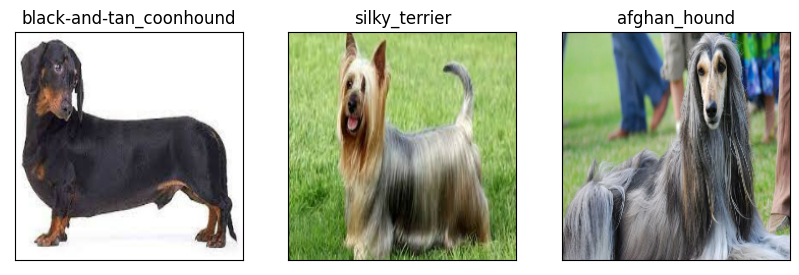

In [194]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

In [139]:
custom_images[0].shape

(224, 224, 3)